In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Loading and joining data

### Loading INSEE codes

In [35]:
df = pd.read_csv('insee-populations.csv', delimiter=";")[['Population totale', 'Code département', 'Code commune', 'Nom de la commune']]
df["code_insee"] = np.where(df['Code département'].apply(str).str.len() == 3, df["Code département"].apply(str).str[:1] + df["Code commune"].apply(str).str.zfill(3), df["Code département"] + df["Code commune"].apply(str).str.zfill(3))
df = df.set_index("code_insee")
df['population_totale'] = df['Population totale'].str.replace('\xa0', '').apply(int)

In [36]:
df.shape

(35441, 5)

In [37]:
df.head()

,Population totale,Code département,Code commune,Nom de la commune,population_totale
code_insee,,,,,
01001,785,01,1,L' Abergement-Clémenciat,785
01002,242,01,2,L' Abergement-de-Varey,242
01004,14 631,01,4,Ambérieu-en-Bugey,14631
01005,1 652,01,5,Ambérieux-en-Dombes,1652
01006,115,01,6,Ambléon,115


### Population per city distribution

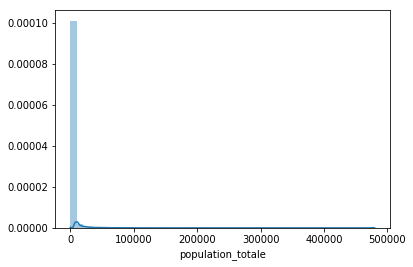

In [15]:
sns.distplot(df['population_totale'])

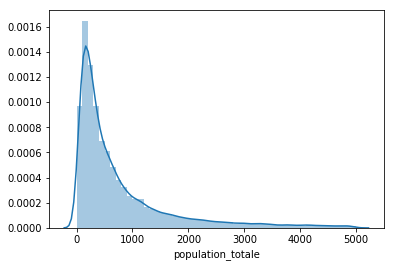

In [17]:
sns.distplot(df[df['population_totale'] < 5000]['population_totale'])

### Cumulative population

In [19]:
grouped = df.groupby(by=['population_totale'])['population_totale'].sum()
cumulative = np.cumsum(grouped) / grouped.sum()

In [58]:
def stats(inhabitants):
    print('< {} inhabitants: {:2.2%} of population, {} cities'.format(inhabitants, cumulative[inhabitants], df[df['population_totale'] > inhabitants].shape[0]))

In [60]:
stats(1000), stats(2000), stats(3000)

< 1000 inhabitants: 13.38% of population, 10083 cities
< 2000 inhabitants: 22.94% of population, 5461 cities
< 3000 inhabitants: 29.15% of population, 3740 cities


(None, None, None)

In [61]:
cumulative[cumulative > 0.20].index[0]

1637

In [43]:
cumulative[1000], cumulative[2000], cumulative[3000], cumulative[5000]

(0.13380600944671844,
 0.2294311448020463,
 0.29150787513974086,
 0.37719947878011545)

In [42]:
df[df['population_totale'] > 1000].shape[0], df[df['population_totale'] > 2000].shape[0], df[df['population_totale'] > 3000].shape[0], df[df['population_totale'] > 5000].shape[0]

(10083, 5461, 3740, 2233)

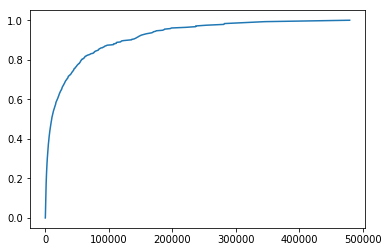

In [136]:
plt.plot(cumulative / grouped.sum())

* 22% of the French population lives in cities which have < 2000 inhabitants
* there are 3 700 cities with 3000+ inhabitants, which is roughly the number of healthcare facilities in France

### Load zipcodes

In [31]:
ldf = pd.read_csv('laposte_hexasmal.csv', delimiter=";")[['Code_commune_INSEE', 'coordonnees_gps', 'Code_postal']]
ldf = ldf.set_index("Code_commune_INSEE")
ldf['code_postal'] = ldf["Code_postal"].apply(str).str.zfill(5)

In [33]:
ldf.shape

(39192, 3)

In [32]:
ldf.head()

,coordonnees_gps,Code_postal,code_postal
Code_commune_INSEE,,,
01001,"46.1534255214,4.92611354223",1400,01400
01005,"45.9961799872,4.91227250796",1330,01330
01009,"45.7873565333,5.65788307924",1300,01300
01017,"45.9337182132,5.48251100314",1230,01230
01019,"45.8541838459,5.58357838695",1510,01510


### Joining datasets

In [74]:
joined = ldf.join(df, how="inner")

In [75]:
joined.shape

(38716, 7)

In [76]:
joined.head()

,coordonnees_gps,Nom_commune,Code_postal,Population totale,Code département,Code commune,Nom de la commune
01001,"46.1534255214,4.92611354223",L ABERGEMENT CLEMENCIAT,1400,785,01,1,L' Abergement-Clémenciat
01002,"46.0091878776,5.42801696363",L ABERGEMENT DE VAREY,1640,242,01,2,L' Abergement-de-Varey
01004,"45.9608475114,5.3729257777",AMBERIEU EN BUGEY,1500,14 631,01,4,Ambérieu-en-Bugey
01005,"45.9961799872,4.91227250796",AMBERIEUX EN DOMBES,1330,1 652,01,5,Ambérieux-en-Dombes
01006,"45.7494989044,5.59432017366",AMBLEON,1300,115,01,6,Ambléon
